In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def atomic_placement(N, dx, dy):
    a = np.linspace(0,N-1,N)
    x = a
    da = np.array([dx]*N)
    
    for i in range(N):
        x = np.append(x,(a+(i+1)*dx))
    
    h = np.ones(N)
    y = h
    dh = np.array([dy]*N)
    
    for j in range(N):
        y = np.append(y,(h + (j+1)*dy))
        
    z = np.ones_like(x) # label the rock salt phase
    
    l = []
    k = 0
    yy = y
    xx = x
    zz = np.ones_like(x)
    pl = []
    
    while k in range(N):
        ran = np.random.random()
        if ran < 0.35: # rock salt chage to O3
            l.append(k)
            k = k+2
        else:    
            k = k+1

    oldr = []
    for i,m in enumerate(l):
        newr = np.random.random()
        v = m-i + len(oldr)
    
        if newr < 0.6:
            pl.append(v)
            yy = np.delete(yy,np.s_[v*N:(v+1)*N])
            xx = np.delete(xx,np.s_[v*N:(v+1)*N])
            if v == 0:
                zz[(v+1)*N:(v+2)*N] = 2
        
            if v == (np.size(zz)/N - 1):
                zz[(v-1)*N:v*N] = 2       
        
            if v != 0 and v != (np.size(zz)/N - 1):
                zz[(v-1)*N:v*N] = 2
                zz[(v+1)*N:(v+2)*N] = 2
    
            zz = np.delete(zz,np.s_[v*N:(v+1)*N])
        
        else:
            n1 = int(np.random.randint(0,(N+1)/2,size = 1))
            n2 = int(np.random.randint((N+1)/2,N+1,size = 1))
            xx[(v*N + n1):(v*N + n2)] = -1
            yy[(v*N + n1):(v*N + n2)] = -1
            if v == 0:
                zz[((v+1)*N + n1):((v+1)*N + n2)] = 2
        
            if v == (np.size(zz)/N - 1):
                zz[((v-1)*N + n1):((v-1)*N + n2)] = 2       
        
            if v != 0 and v != (np.size(zz)/N - 1):
                zz[((v-1)*N + n1):((v-1)*N + n2)] = 2 
                zz[((v+1)*N + n1):((v+1)*N + n2)] = 2
    
            zz[(v*N + n1):(v*N + n2)] = 0
            oldr.append(1)
            
    for s,n in enumerate(pl):
        j = 0
        while j in range(N):
            if np.random.random() < 0.2: # O3 change to O1
                if j+1 < N:
                    if 0 < n < np.size(xx)/N:
                        if xx[(n-1)*N+j] != xx[n*N + j-1]:
                            xx[n*N+j] = xx[(n-1)*N + j]
                            xx[n*N+j+1] = xx[(n-1)*N + j + 1]       
     
                            # change the label, z = 3 is O1
                            zz[n*N+j] = 3
                            zz[n*N+j+1] = 3
                            zz[(n-1)*N + j] = 3
                            zz[(n-1)*N + j + 1] = 3
                
                    if n == 0:
                        xx[n*N+j] = xx[n*N + j] - dx*2
                        xx[n*N+j+1] = xx[n*N + j + 1] - dx*2 
                        zz[n*N+j] = 3
                        zz[n*N+j+1] = 3
                
                    if n == np.size(xx)/N:
                        if xx[(n-1)*N+j] != xx[n*N + j-1]:
                            zz[(n-1)*N + j] = 3
                            zz[(n-1)*N + j + 1] = 3
            
                else:
                    if 0 < n < np.size(xx)/N:
                        if xx[(n-1)*N+j] != xx[n*N + j-1]:
                            xx[n*N+j] = xx[(n-1)*N + j]        
    
                            # change the label, z = 3 is O1
                            zz[n*N+j] = 3
                            zz[(n-1)*N + j] = 3
                
                    if n == 0:
                        xx[n*N+j] = xx[n*N + j] - dx*2
                        zz[n*N+j] = 3
                
                    if n == np.size(xx)/N:
                        if xx[(n-1)*N+j] != xx[n*N + j-1]:
                            zz[(n-1)*N + j] = 3
                            
                j = j + 2 
            else:
                j = j + 1
                
                
    xxx = xx[xx != -1]
    yyy = yy[yy != -1]
    zzz = zz[zz!=0]
    
    nxxx = xxx
    nyyy = yyy
    
    # Adding atomic perturbations
    for i in range(len(nxxx)): 
        yadd = np.random.normal(0, 0.1, 1)
        xadd = np.random.normal(0, 0.1, 1)
        
        if np.abs(yadd) > 0.15: #15%扰动
            yadd = 0.15
        if np.abs(xadd) > 0.10: # 10%扰动
            xadd = 0.10
            
        if i == 0:
            bd = nxxx[1] -nxxx[0]
        if i == len(nxxx) -1:
            bd = nxxx[i] -nxxx[i-1]
        if i != 0 and i != len(nxxx) -1:
            bd = np.min(np.array([np.abs(nxxx[i] - nxxx[i-1]), np.abs(nxxx[i+1] - nxxx[i])]))
    
        nxxx[i] = nxxx[i] + xadd*bd
        nyyy[i] = nyyy[i] + yadd*dy
    
    # Create a list of colors based on z values
    colors = ['blue' if zi == 1 else 'red' if zi == 2 else 'green' for zi in zzz]

    # Create a dictionary to map z values to labels
    phase_labels = {
        'blue': "Rock Salt Phase",
        'red': "O3 Phase",
        'green': "O1 Phase"
    }

    # Create a legend handler for each color group
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=phase_labels[color])
                      for color in ['blue', 'red', 'green']]

    # Create the scatter plot with colors
    plt.figure(figsize=(12, 5))
    plt.xlim(0, np.max(nxxx)+1)
    plt.ylim(0, np.max(nyyy)+1)
    plt.axis('off')
    plt.scatter(nxxx, nyyy, s=30, c=colors)
    #plt.savefig('test.png')
    # Set the title for the entire image
    #plt.title("Polycrystalline Phase Diagram")

    # Display the legend with the specified labels
    #plt.legend(handles=legend_handles, loc='upper left')

    plt.show()
    '''
    # Create the scatter plot with colors
    plt.figure(figsize=(12, 5))
    plt.xlim(0, np.max(nxxx)+1)
    plt.ylim(0, np.max(nyyy)+1)
    plt.axis('off')
    plt.scatter(nxxx, nyyy, s=30, c=colors)
    
    plt.show()
    '''
    return xxx, yyy, zzz

/var/folders/ch/p7lsygk96wxd15dhc1y92zlh0000gn/T/ipykernel_64000/1907799755.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n1 = int(np.random.randint(0,(N+1)/2,size = 1))
/var/folders/ch/p7lsygk96wxd15dhc1y92zlh0000gn/T/ipykernel_64000/1907799755.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n2 = int(np.random.randint((N+1)/2,N+1,size = 1))
/var/folders/ch/p7lsygk96wxd15dhc1y92zlh0000gn/T/ipykernel_64000/1907799755.py:145: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecate

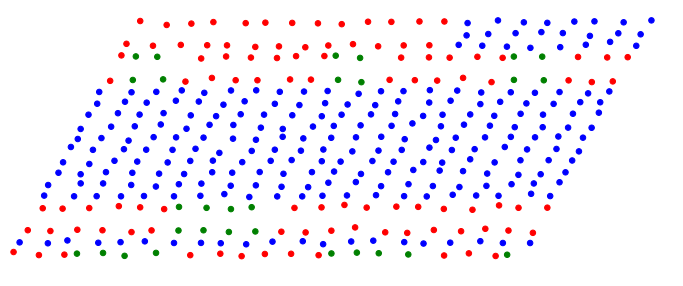

In [3]:
N = 21 # N*N is number of atoms
dx = 0.25
dy = np.sqrt(3)/2

xxx, yyy, zzz = atomic_placement(N, dx, dy)

In [4]:
import torch
from PIL import Image

#572
output_shape = (572, 572)  # Example dimensions

# Function to convert coordinates to a U-Net compatible image
def coords_to_image(xxx, yyy, zzz, output_shape):
    # Create an empty image
    image = Image.new('L', output_shape, 0)
    
    # Normalize coordinates to the output shape
    xxx_normalized = (xxx / max(xxx) * (output_shape[1] - 1)).astype(int)
    yyy_normalized = (yyy / max(yyy) * (output_shape[0] - 1)).astype(int)
    
    # Draw points on the image based on the labels
    for x, y, z in zip(xxx_normalized, yyy_normalized, zzz):
        if z == 1:  
            image.putpixel((x, y), 255)  
        if z == 2:
            image.putpixel((x, y), 255)
        if z == 3:
            image.putpixel((x, y), 255)

    # Convert to a numpy array and normalize the pixel values
    image_array = np.array(image)
    plt.imshow(image_array)
    #plt.savefig('image.png')
    # Convert to a PyTorch tensor and add channel and batch dimensions
    image_tensor = torch.tensor(image_array).unsqueeze(0).unsqueeze(0)

    return image_tensor

# unet_input is now ready to be used as input for the U-Net model

In [5]:
def coords_to_ground_truth(xxx, yyy, zzz, output_shape):
    # Create an empty image for ground truth with a single channel
    ground_truth = np.zeros(output_shape, dtype=np.uint8)
    
    # Normalize coordinates to the output shape
    xxx_normalized = (xxx / max(xxx) * (output_shape[1] - 1)).astype(int)
    yyy_normalized = (yyy / max(yyy) * (output_shape[0] - 1)).astype(int)
    
    # Draw points on the ground truth image based on the labels
    for x, y, z in zip(xxx_normalized, yyy_normalized, zzz):
        ground_truth[y, x] = z  

    # Convert the NumPy array to a PyTorch tensor, add a channel dimension, and normalize if necessary
    ground_truth_tensor = torch.from_numpy(ground_truth).long().unsqueeze(0)  # Add batch dimension

    return ground_truth_tensor

/Users/dengyujia/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/var/folders/ch/p7lsygk96wxd15dhc1y92zlh0000gn/T/ipykernel_64000/1907799755.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n1 = int(np.random.randint(0,(N+1)/2,size = 1))
/var/folders/ch/p7lsygk96wxd15dhc1y92zlh0000gn/T/ipykernel_64000/1907799755.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n2 = int(np.random.randint((N+1)/2,N+1,size = 1))
/var/folders/ch/p7lsy

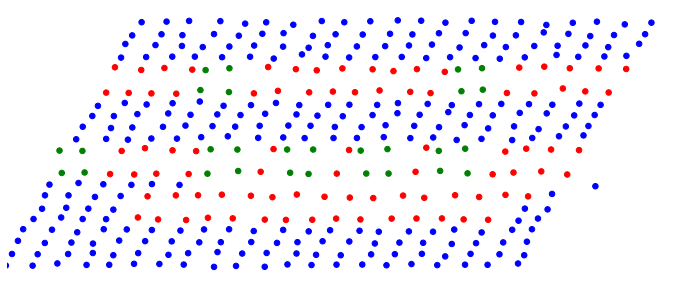

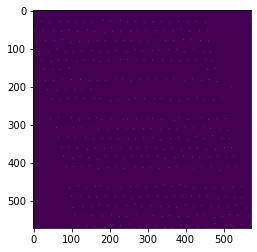

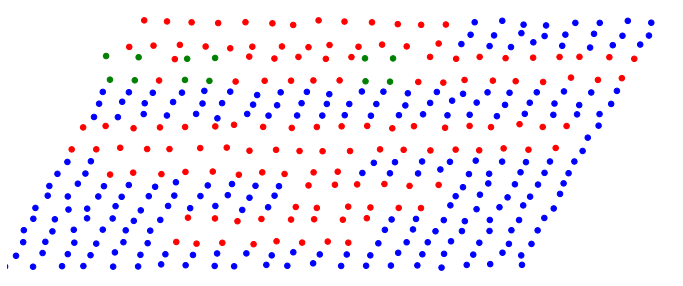

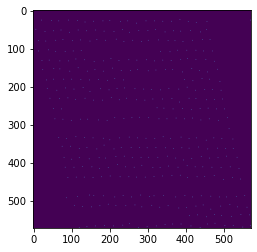

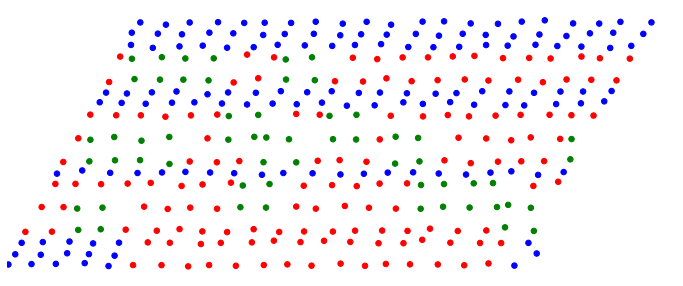

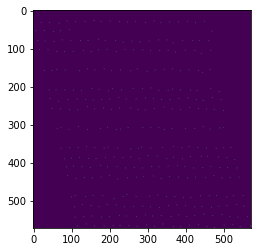

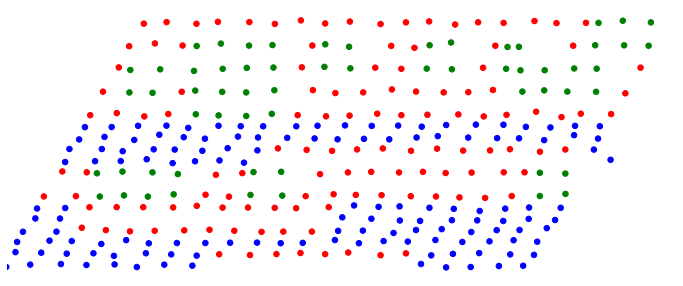

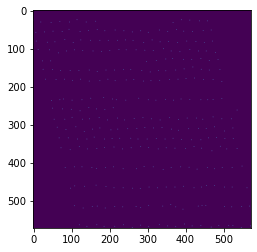

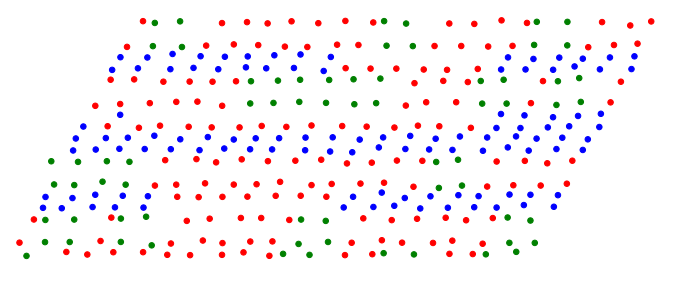

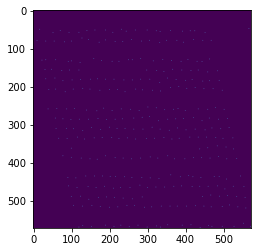

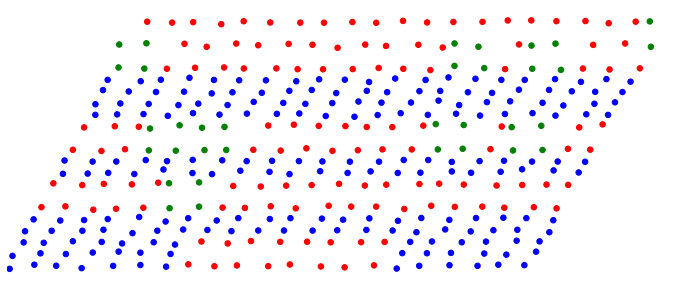

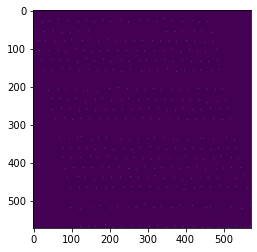

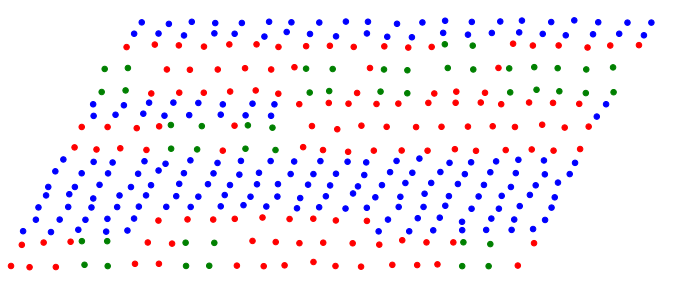

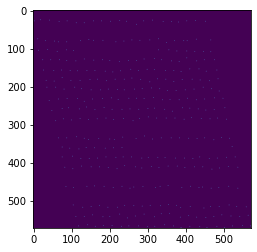

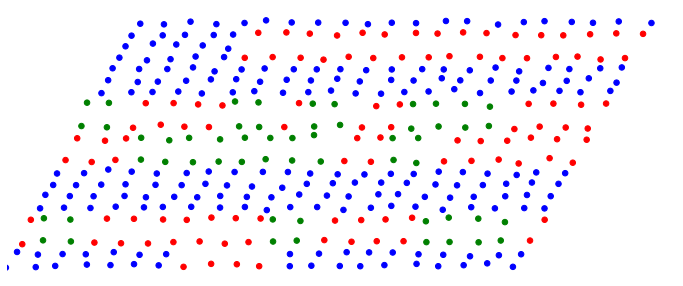

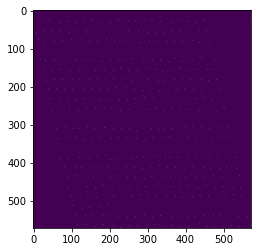

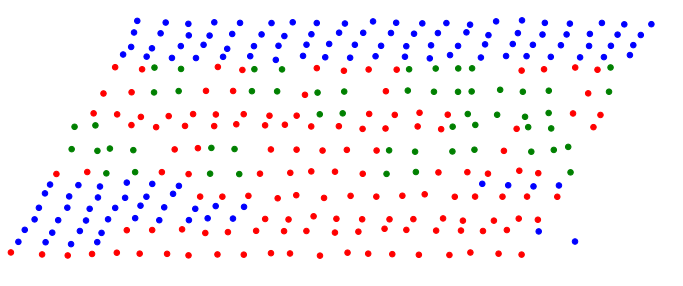

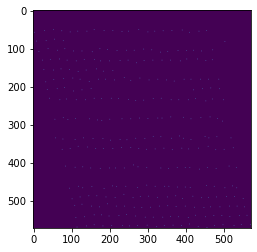

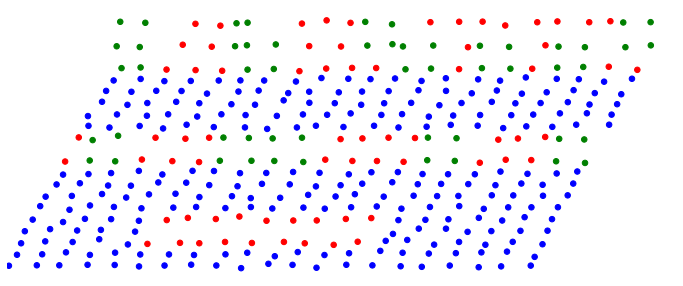

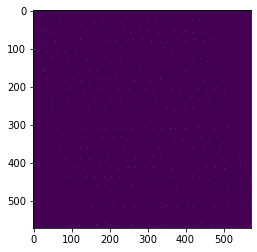

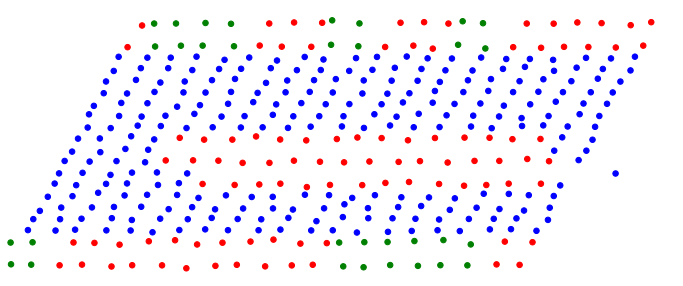

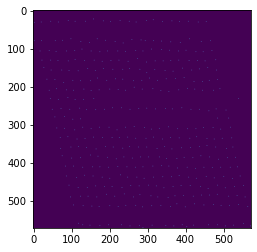

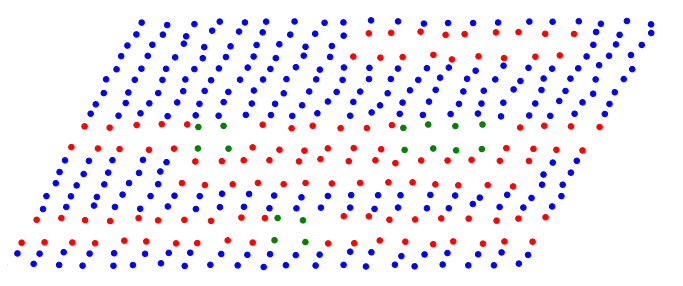

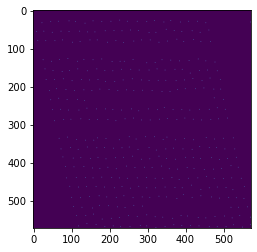

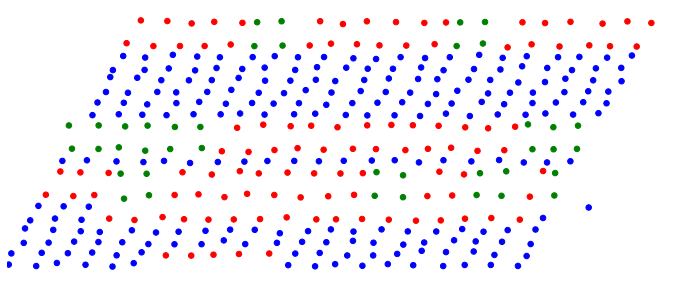

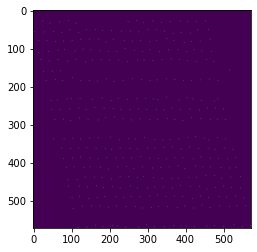

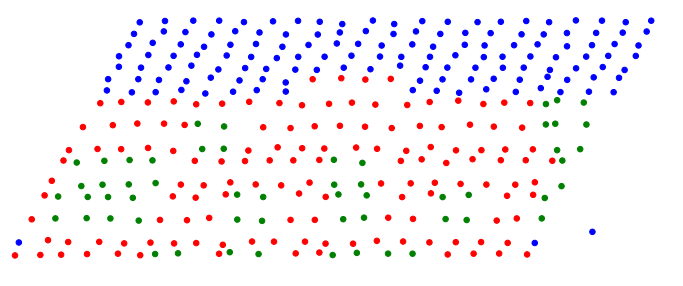

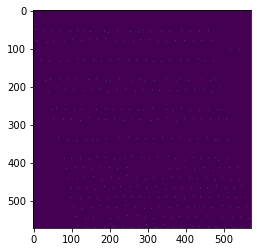

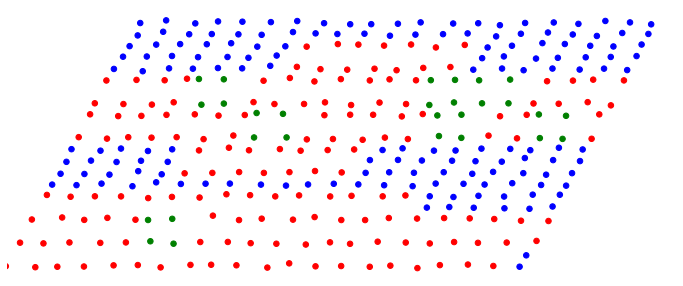

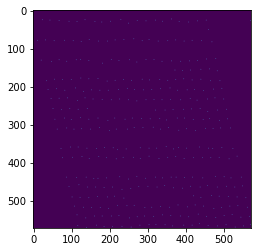

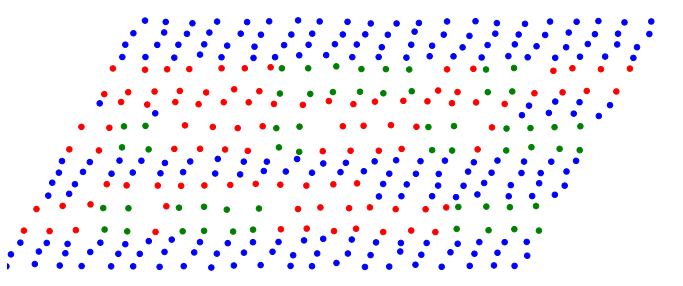

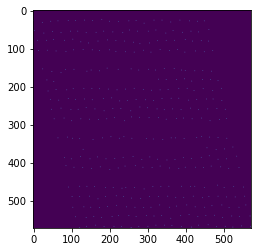

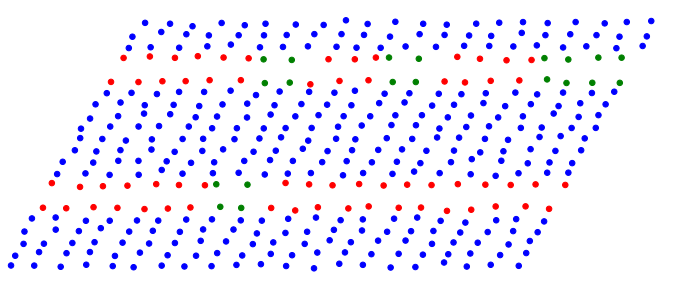

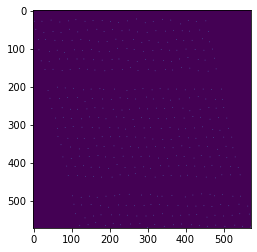

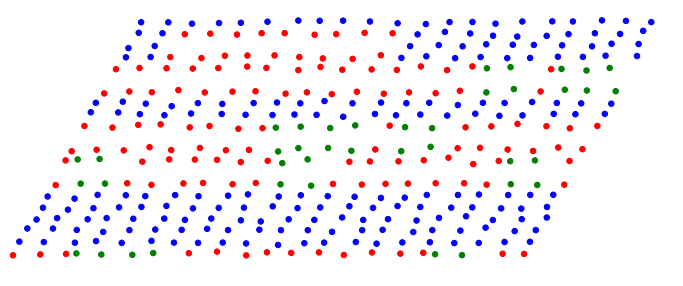

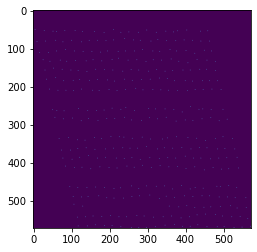

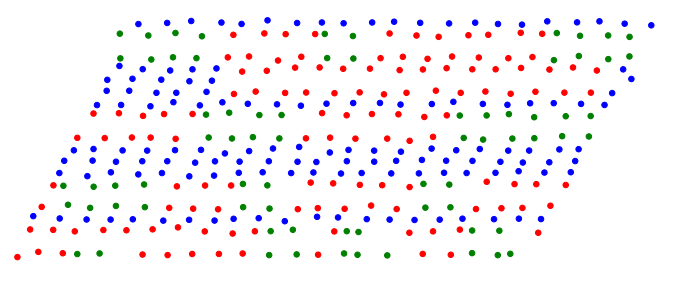

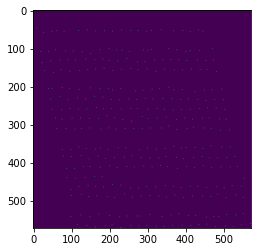

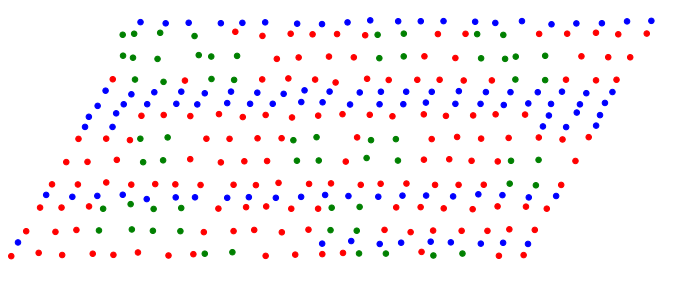

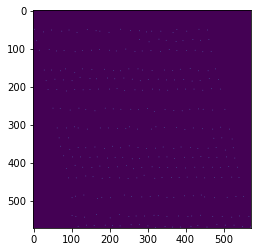

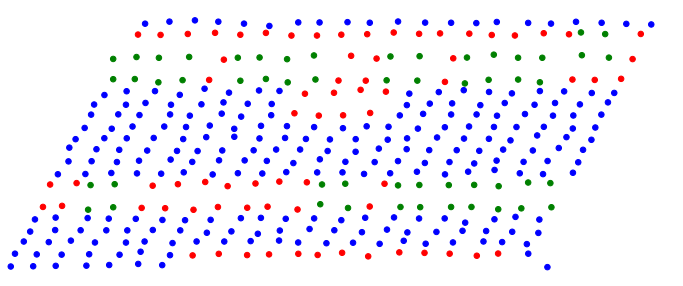

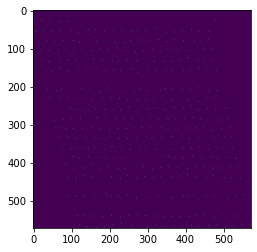

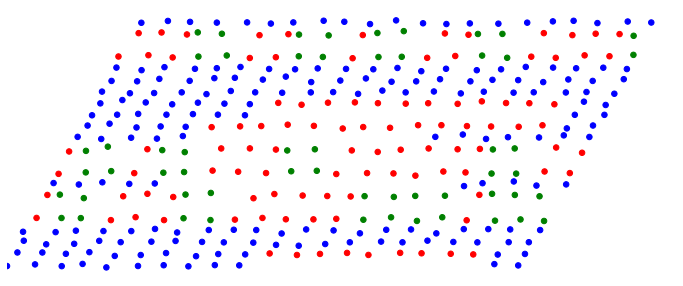

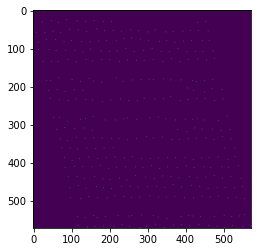

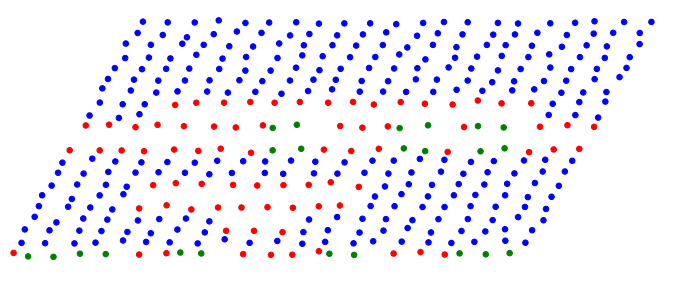

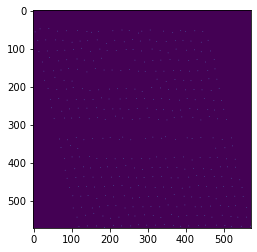

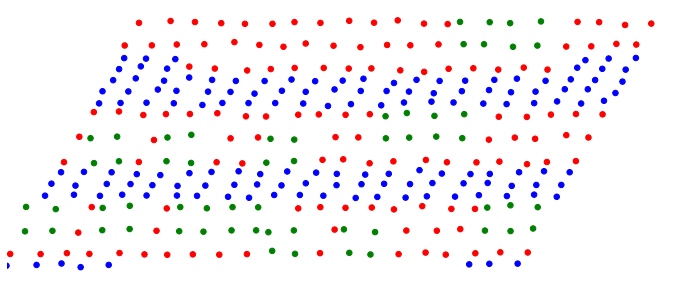

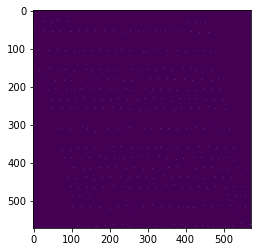

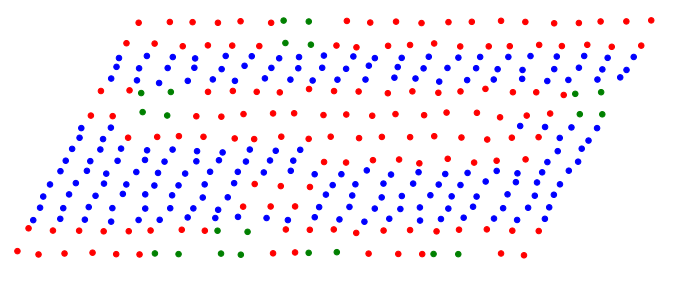

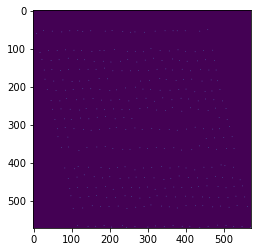

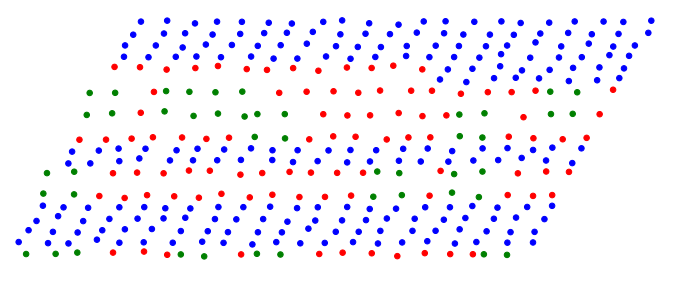

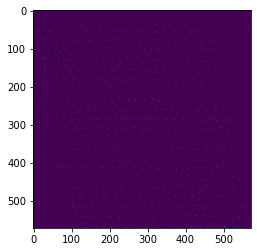

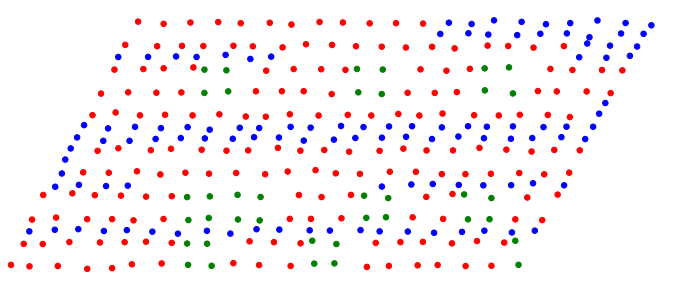

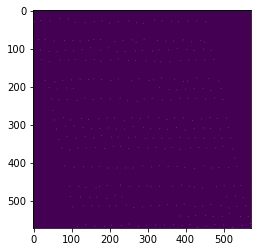

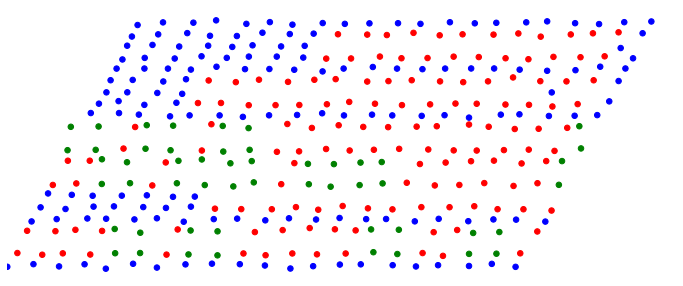

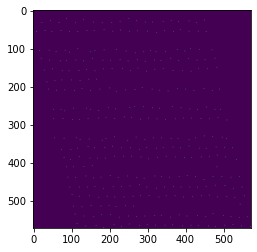

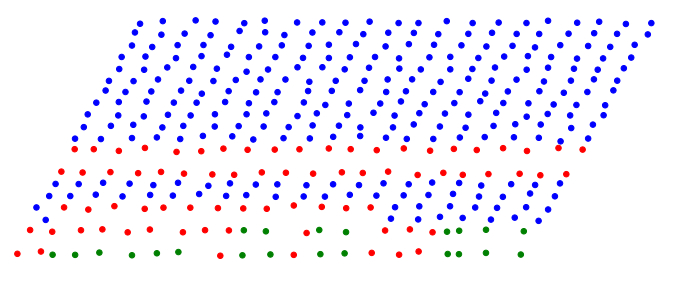

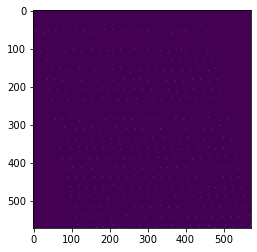

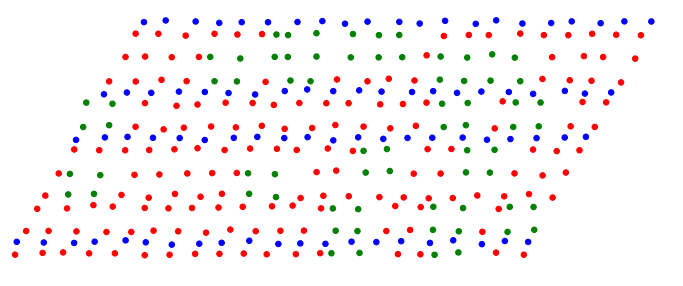

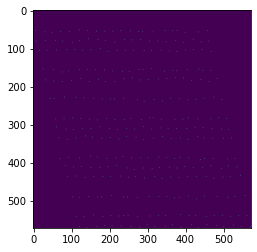

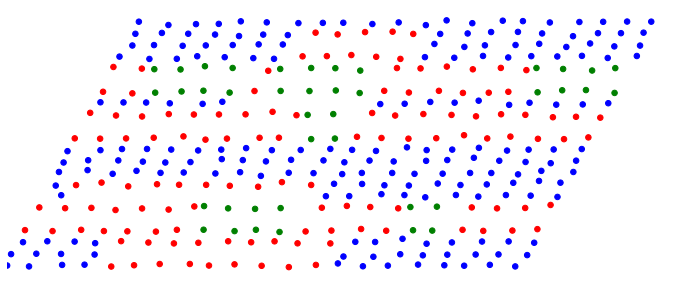

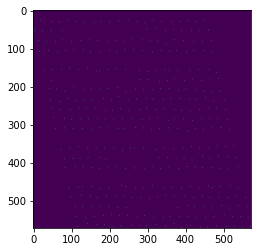

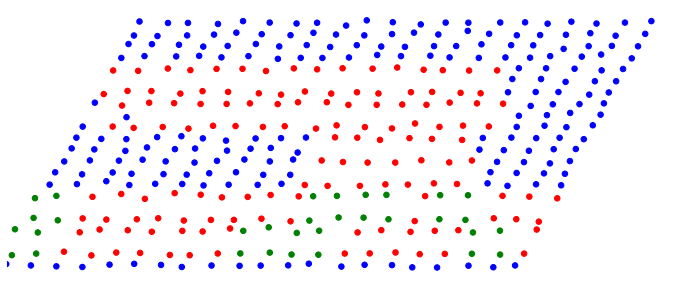

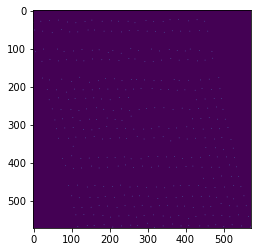

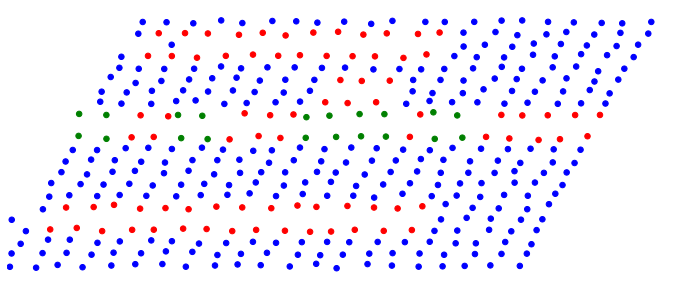

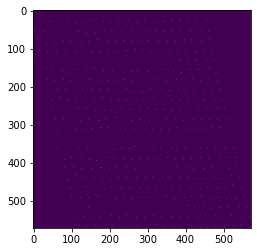

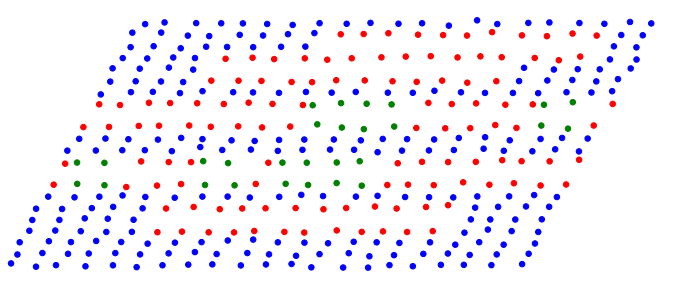

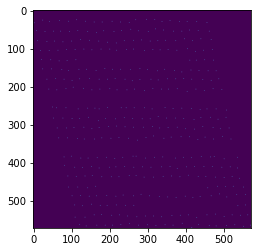

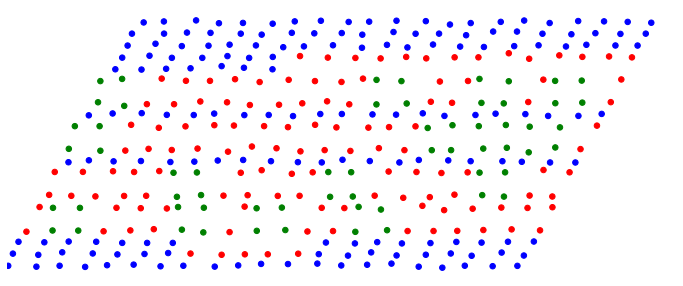

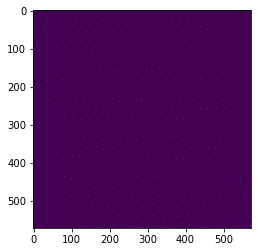

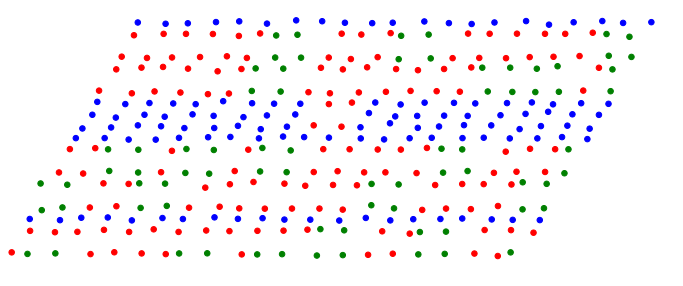

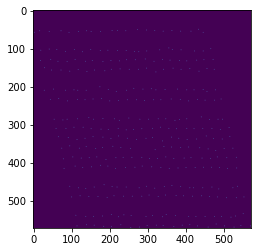

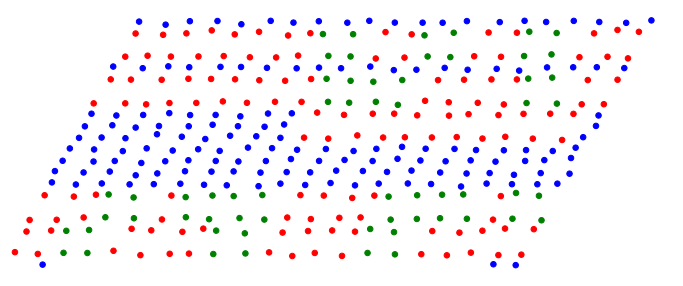

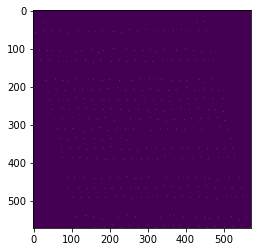

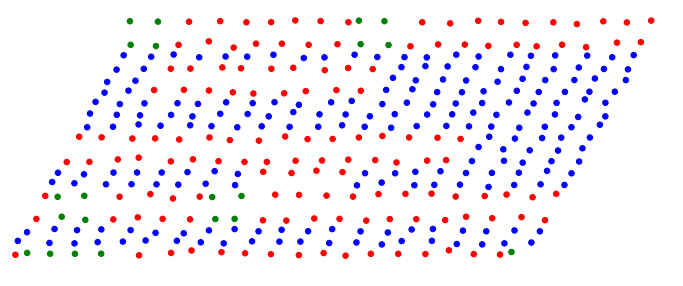

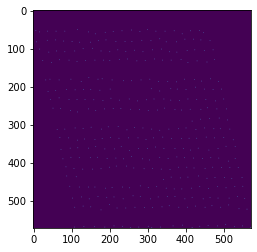

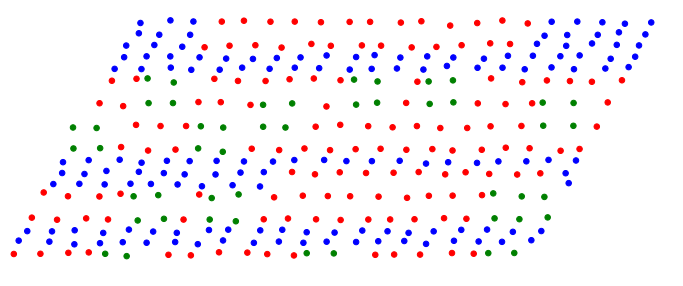

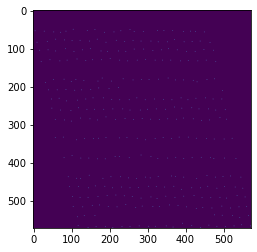

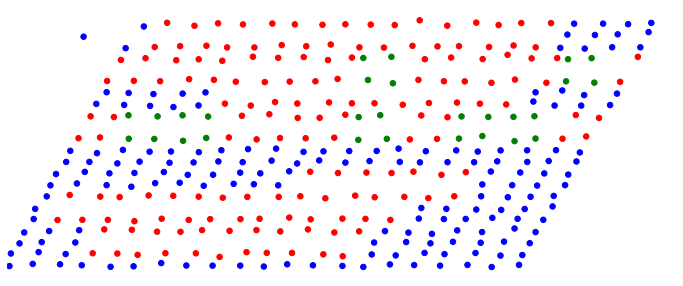

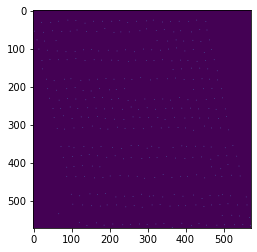

In [6]:
import torch
from sklearn.model_selection import train_test_split

times = 40
unet_input_sum = []
gdt_sum = []

for t in range(times):
    xxx, yyy, zzz = atomic_placement(N, dx, dy)
    unet_input = coords_to_image(xxx, yyy, zzz, output_shape)
    unet_input_sum.append(unet_input)
    
    gdt = coords_to_ground_truth(xxx, yyy, zzz, output_shape)
    gdt_sum.append(gdt)
    
all_inputs = torch.cat(unet_input_sum, dim=0)
all_gdt = torch.cat(gdt_sum, dim=0)

inputs_train, inputs_val, labels_train, labels_val = train_test_split(
    all_inputs, all_gdt, test_size=0.2, random_state=42
)

In [7]:
from torch.utils.data import DataLoader, TensorDataset

# Assuming inputs_train, inputs_val, labels_train, and labels_val are already defined
train_dataset = TensorDataset(inputs_train, labels_train)
val_dataset = TensorDataset(inputs_val, labels_val)

# Create DataLoaders for both datasets
batch_size = 8  # Define the batch size that fits your memory and training needs

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # Shuffle the training data
    num_workers=4,  # Use 4 subprocesses for loading data
    pin_memory=True  # Recommended for use with GPUs for faster data transfer from CPU to GPU
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle the validation data
    num_workers=4,
    pin_memory=True
)

# Now you can loop through train_loader and val_loader to get batches of data


In [8]:
import torch
import torch.optim as optim
import torch.nn as nn
from unet import UNet
# Assuming 'net' is your instantiated U-Net model
net = UNet(in_channels=1, out_classes=4)  # Replace with your actual number of classes

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=3e-4)


num_epochs = 160 # 160 round
L = []

for epoch in range(num_epochs):
    # Training loop for each epoch
    for inputs, labels in train_loader:
        inputs = inputs.float()
        labels = labels.long()

        # Forward pass
        outputs = net(inputs)

        # Reset gradient information
        optimizer.zero_grad()

        labels_cropped = labels[:, 91:479, 91:479]

        # Calculate the loss with the cropped labels
        loss = criterion(outputs, labels_cropped)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Print the loss at the end of each epoch
    L.append(loss.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/160], Loss: 1.1806796789169312
Epoch [2/160], Loss: 0.35161352157592773
Epoch [3/160], Loss: 0.0593172125518322
Epoch [4/160], Loss: 0.03693804517388344
Epoch [5/160], Loss: 0.04894453287124634
Epoch [6/160], Loss: 0.015738584101200104
Epoch [7/160], Loss: 0.007467059418559074
Epoch [8/160], Loss: 0.003557738848030567
Epoch [9/160], Loss: 0.002354946918785572
Epoch [10/160], Loss: 0.001807502587325871
Epoch [11/160], Loss: 0.0017954872455447912
Epoch [12/160], Loss: 0.0014531344641000032
Epoch [13/160], Loss: 0.0013174659106880426
Epoch [14/160], Loss: 0.0013200361281633377
Epoch [15/160], Loss: 0.0012653227895498276
Epoch [16/160], Loss: 0.001350383972749114
Epoch [17/160], Loss: 0.0012047308264300227
Epoch [18/160], Loss: 0.001157959341071546
Epoch [19/160], Loss: 0.0011346819810569286
Epoch [20/160], Loss: 0.0010685361921787262
Epoch [21/160], Loss: 0.001076101791113615
Epoch [22/160], Loss: 0.0010491401189938188
Epoch [23/160], Loss: 0.001031559775583446
Epoch [24/160], Lo

KeyboardInterrupt: 

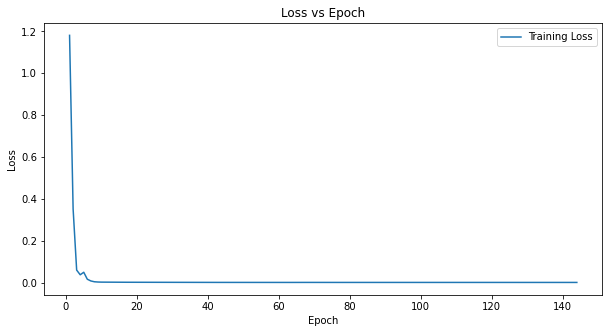

In [19]:
plt.figure(figsize=(10, 5))
# Plotting Loss vs Epoch
epochs = list(range(1, 145))
plt.plot(epochs, L, label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

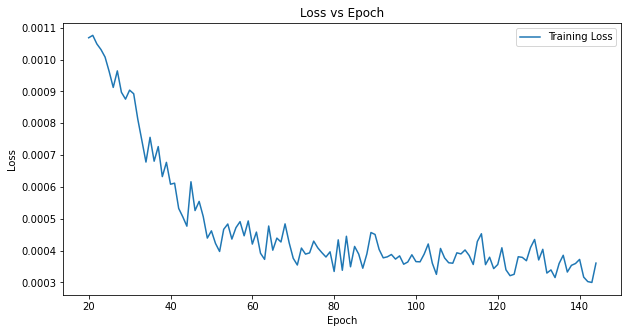

In [21]:
plt.figure(figsize=(10, 5))

# Plotting Loss vs Epoch
epochs = list(range(20, 145))
plt.plot(epochs, L[19:], label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**new data**

/var/folders/ch/p7lsygk96wxd15dhc1y92zlh0000gn/T/ipykernel_64000/1907799755.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n1 = int(np.random.randint(0,(N+1)/2,size = 1))
/var/folders/ch/p7lsygk96wxd15dhc1y92zlh0000gn/T/ipykernel_64000/1907799755.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n2 = int(np.random.randint((N+1)/2,N+1,size = 1))
/var/folders/ch/p7lsygk96wxd15dhc1y92zlh0000gn/T/ipykernel_64000/1907799755.py:145: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecate

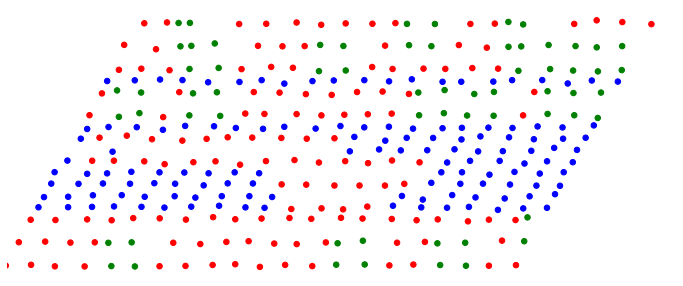

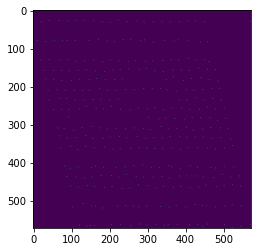

In [22]:
times = 1
unet_input_sum = []
gdt_sum = []

for t in range(times):
    xxx, yyy, zzz = atomic_placement(N, dx, dy)
    unet_input = coords_to_image(xxx, yyy, zzz, output_shape)
    unet_input_sum.append(unet_input)
    
    gdt = coords_to_ground_truth(xxx, yyy, zzz, output_shape)
    gdt_sum.append(gdt)
    
new_inputs = torch.cat(unet_input_sum, dim=0)
new_gdt = torch.cat(gdt_sum, dim=0)

In [25]:
# Prepare new data (e.g., normalize, crop, etc., as was done for the training data)
new_data = new_inputs# ... your data preprocessing steps here ...

# Make sure the model is in evaluation mode
net.eval()

# No gradient calculation needed during inference
with torch.no_grad():
    new_data = new_data.float()
    # Forward pass to get predictions
    predictions = net(new_data)

# Post-process predictions (e.g., apply threshold, take argmax, etc.)
segmented_output = torch.argmax(predictions, dim=1).cpu().numpy()

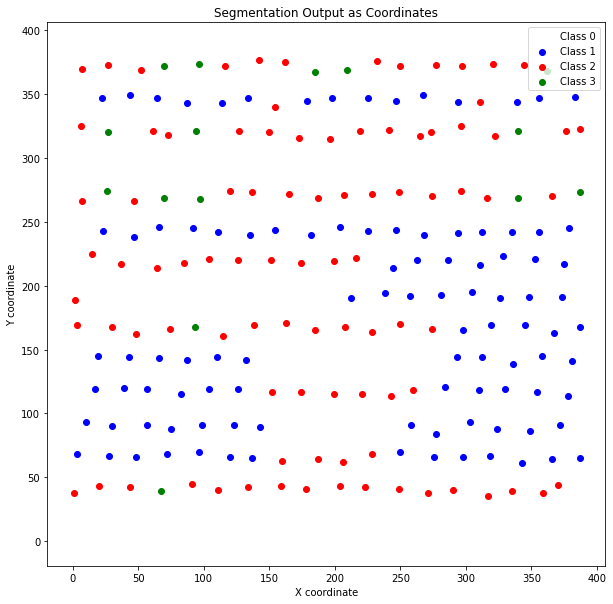

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# segmented_output is assumed to be a numpy array with shape [height, width]
# where each element represents the predicted class for that pixel
segmented_output = segmented_output.squeeze()
# Define colors for each class
colors = ['white', 'blue', 'red', 'green']  # Add more colors if you have more classes

# Initialize scatter plot coordinates for each class
scatter_data = {cls: {'x': [], 'y': []} for cls in range(len(colors))}

# Gather coordinates for each class
for y in range(segmented_output.shape[0]):
    for x in range(segmented_output.shape[1]):
        cls = segmented_output[y, x]
        scatter_data[cls]['x'].append(x)
        scatter_data[cls]['y'].append(y)

# Create the scatter plot
plt.figure(figsize=(10, 10))
for cls, data in scatter_data.items():
    plt.scatter(data['x'], data['y'], c=colors[cls], label=f'Class {cls}')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Segmentation Output as Coordinates')
plt.legend()
plt.savefig('segment.png')
plt.show()

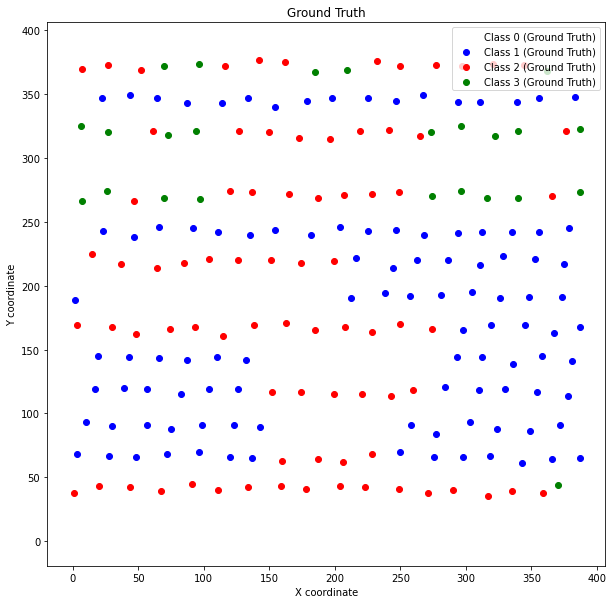

In [28]:
all_gdt_crops = new_gdt[:, 91:479, 91:479]

# Initialize scatter plot coordinates for each class in ground truth
scatter_data_gdt = {cls: {'x': [], 'y': []} for cls in range(len(colors))}

# Gather coordinates for each class in ground truth
for y in range(all_gdt_crops.shape[1]):
    for x in range(all_gdt_crops.shape[2]):
        cls = int(all_gdt_crops[0, y, x])  # Convert tensor to integer
        scatter_data_gdt[cls]['x'].append(x)
        scatter_data_gdt[cls]['y'].append(y)

# Create the scatter plot for ground truth
plt.figure(figsize=(10, 10))
for cls, data in scatter_data_gdt.items():
    plt.scatter(data['x'], data['y'], c=colors[cls], label=f'Class {cls} (Ground Truth)')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Ground Truth')
plt.legend()
plt.savefig('ground.png')
plt.show()

In [11]:
for i in range(len(L)):
    L[i] = L[i].item()

In [12]:
print(L)

[1.1806796789169312, 0.35161352157592773, 0.0593172125518322, 0.03693804517388344, 0.04894453287124634, 0.015738584101200104, 0.007467059418559074, 0.003557738848030567, 0.002354946918785572, 0.001807502587325871, 0.0017954872455447912, 0.0014531344641000032, 0.0013174659106880426, 0.0013200361281633377, 0.0012653227895498276, 0.001350383972749114, 0.0012047308264300227, 0.001157959341071546, 0.0011346819810569286, 0.0010685361921787262, 0.001076101791113615, 0.0010491401189938188, 0.001031559775583446, 0.001008006278425455, 0.0009628264815546572, 0.0009125897195190191, 0.0009644875535741448, 0.000897326332051307, 0.000875778729096055, 0.0009039781289175153, 0.000892666750587523, 0.0008129348861984909, 0.0007458026520907879, 0.0006780959665775299, 0.0007558069191873074, 0.0006808263715356588, 0.0007266976754181087, 0.000632409704849124, 0.0006771563785150647, 0.0006085080094635487, 0.0006117797456681728, 0.0005324415396898985, 0.0005061598494648933, 0.00047673459630459547, 0.0006162076

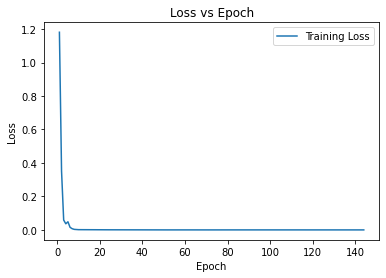

In [13]:
import matplotlib.pyplot as plt

# Your loss data
for i in range(len(L)):
    L[i] = L[i].item()

# Plotting Loss vs Epoch
epochs = list(range(1, 145))
plt.plot(epochs, L, label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
